## Problem Statement

<img align="left" src="./images/linear_regression/02_01_linear_regression_problem.png"    style=" width:60%; height: auto; padding-right: 20px  " /> 

**House Price Prediction**
We will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------- | ------------------------ |
| 1.0                  | 300                      |
| 2.0                  | 500                      |

We would like to fit a linear regression model (shown above as the blue straight line) through these two points, so we can then predict price for other houses - say, a house with 1200 sqft.



### Notations:

* X_train       - Input training data (here the size of house in 1000 sqft)
* y_train       - Output training data (here price of the house in $1000)
* m             - size of training data (here 2)
* (x_i, y_i)    - ($x^{(i)}$,$y^{(i)}$) denote the $i^{th}$ training example

### Creation of Input Data

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# X_train is the input variable (size in 1000 square feet)
X_train = np.array([1.0, 2.0])

# y_train is the target (price in 1000s of dollars)
y_train = np.array([300.0, 500.0])

In [3]:
# m is the total no. of training data
m = X_train.shape[0]

print(f"Number of training examples: {m}")

Number of training examples: 2


Text(0.5, 0, 'Size (1000 sqft)')

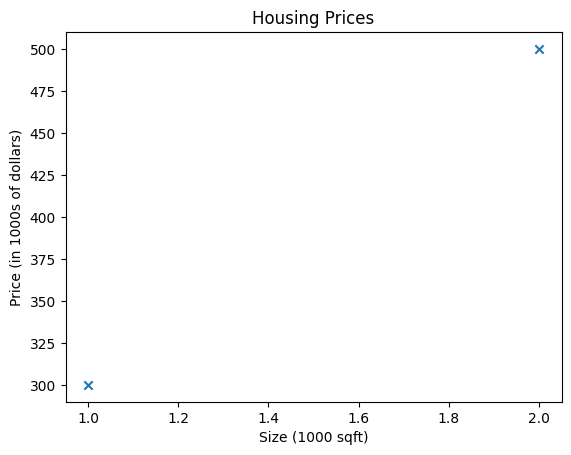

In [4]:
# Plotting the training data points
plt.scatter(X_train, y_train, marker='x')
plt.title("Housing Prices") # Set the title
plt.ylabel('Price (in 1000s of dollars)') # Set the y-axis label
plt.xlabel('Size (1000 sqft)') # Set the x-axis label

## Model function

<img align="left" src="./images/linear_regression/02_02_linear_regression_function_definition.png" style=" width:60%; padding-right: 20px; " > 

The model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/>

In [5]:
def model_function(x_i, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x_i               : input feature
      w,b (scalar)      : model parameters  
    Returns
      y_i               : model_prediction i.e. y = w * x + b
    """
    y_i = w * x_i + b
    return y_i

In [6]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values i.e. y = w * x + b
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = model_function(x[i], w, b)
        
    return f_wb

In [7]:
# Setting some values for 'w' and 'b'

w = 200
b = 100

y_predictions = compute_model_output(X_train, w, b)

In [8]:
# Model predictions for the training data input
y_predictions

array([300., 500.])

Text(0.5, 0, 'Size (1000 sqft)')

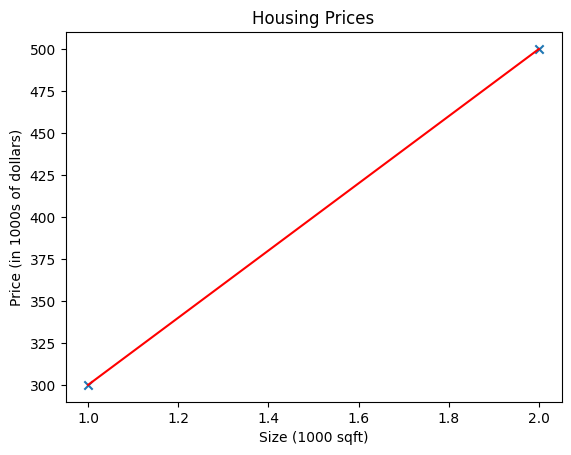

In [9]:
# Plotting the predicted data points
plt.scatter(X_train, y_train, marker='x')
plt.plot(X_train, y_predictions, color='red') # Plotting linear line for predictions
plt.title("Housing Prices") # Set the title
plt.ylabel('Price (in 1000s of dollars)') # Set the y-axis label
plt.xlabel('Size (1000 sqft)') # Set the x-axis label

Repeat the process with different values of $w$ and $b$ to come with a suitable combination and then use it to predict the price of the house when size is 1200 sqft

In [10]:
w = 200
b = 100

X_test = np.array([1.2])

y_test_predictions = compute_model_output(X_test, w, b)

print(f"Price of house for {X_test * 1000} sqft: {y_test_predictions * 1000} dollors")

Price of house for [1200.] sqft: [340000.] dollors


### Computing Cost
The term 'cost' is a measure how well our model is predicting the target output.

It is generally termed as **Squared Cost Function** The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.


<img src="./images/linear_regression/02_03_linear_regression_cost_function.jpg" style=" width:60%; padding-right: 20px; ">

Cost function changes for different values of model function parameters.


The graph shows how the cost function changes for different values of $w$ when $b$ = 0. The graph appears like a bowl shape. Our goal is to minimize the cost which gives as the good model. Looking at the graph we can conclude that $w$ = 1 is the best value which will give us the best model

<img src="./images/linear_regression/02_04_linear_regression_cost_function_intuition.jpg" style=" width:60%; padding-right: 20px; ">

<br>

In real time, we have to choose the best possible values of $w$ and $b$ both to get the best linear regression model. The graph shows below the representation of cost function for different values of w, b. Since there are two parameters the graph will be 3D graph. It can also be plotted as contour plot. Both of them are shown below.

<img align="left" src="./images/linear_regression/02_06_linear_regression_cost_function_all.jpg" style=" width:55%; padding-right: 20px; ">

<img src="./images/linear_regression/02_05_linear_regression_cost_function_3D.jpg" style=" width:calc(45% - 20px);">


#### Implementation

In [11]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = model_function(x[i], w, b)
        cost = (f_wb - y[i]) ** 2  
        # print(f"f_wb(x{i}) = {f_wb}; y[{i}] = {y[i]}; cost[{i}] = {cost}")   
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [12]:
w = 200
b = 100
final_cost = compute_cost(X_train, y_train, w, b)
print(f"Cost of function for {w}, {b} = {final_cost}")

Cost of function for 200, 100 = 0.0


In [13]:
w = 100
b = 100
final_cost = compute_cost(X_train, y_train, w, b)
print(f"Cost of function for {w}, {b} = {final_cost}")

Cost of function for 100, 100 = 12500.0


In [14]:
w = 50
b = 200
final_cost = compute_cost(X_train, y_train, w, b)
print(f"Cost of function for {w}, {b} = {final_cost}")

Cost of function for 50, 200 = 10625.0


In [15]:
# Creating a large range of values for w
w_array = np.arange(100, 300)
b = 100 # Keeping b as constant

# Calculation cost for all the values of w
cost_function_array = np.zeros(len(w_array))
for i in range(len(w_array)):
    cost_function_array[i] = compute_cost(X_train, y_train, w_array[i], b)


#### Plotting the cost function graph

Text(0.5, 1.0, 'Cost function graph')

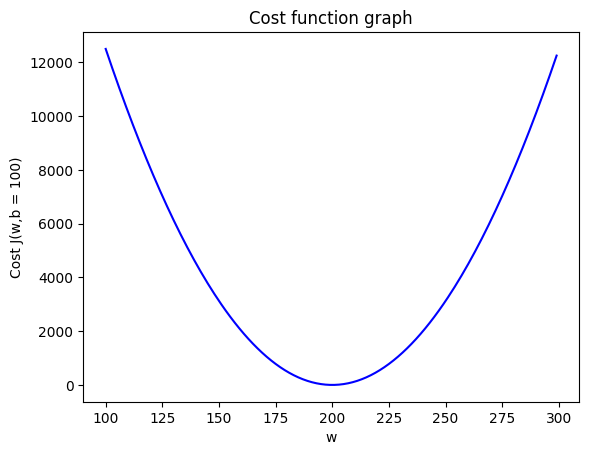

In [16]:
plt.plot(w_array, cost_function_array, color='blue')
plt.xlabel("w")
plt.ylabel(f"Cost J(w,b = {b})")
plt.title("Cost function graph")

Hence,
- The cost equation provides a measure of how well your predictions match your training data.
- Minimizing the cost can provide optimal values of $w$, $b$.

### Gradient Descent

- It is an algorithm which is used to find the optimal values of $w$ and $b$ by minimizing the cost
- It can be applied in almost all the machine learning models including complex algorithms like Deep learning, Neural networks, etc.

> The cost function may not always be bowl shaped. It can have multiple low values known as $local minimum$ and the lowest of all the $local minimum$ is known as $global minimum$

Refer the diagram below for such example:

<img src="./images/linear_regression/02_07_linear_regression_gradient_descent.jpg" style=" width: 60%; ">

**Algorithm Outline**
- Start with some value of $w$ and $b$
- Keep changing the values for $w$ and $b$ simultaneously to reduce $J(w, b)$
- Settle at or near minimum

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{2}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{3}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.


#### How the algorithm works

<img align="left" src="./images/linear_regression/02_08_linear_regression_gradient_intiution.jpg" style=" width: 60%; padding-right:20px; ">

As per the diagram we can see that if we choose a value of $w$ and $b$ such that the cost is on the right of the minimum value then the slope (gradient/derivative) becomes a negative number, hence the $w$ and $b$ values are reduced. 

Similarly if we choose a value of $w$ and $b$ such that the cost is on the left of the minimum value then the slope (gradient/derivative) becomes a positive number, hence the $w$ and $b$ values are increased.

In both the scenarios the algorithm updates the $w$ and $b$ value to provide optimal cost


#### Implementation

In [17]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [18]:
def gradient_descent(x, y, w_in, b_in, alpha=0.001, num_iters=10000): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float)     : Learning rate
      num_iters (int)   : number of iterations to run gradient descent
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      """
    
    temp_w = w_in
    temp_b = b_in

    for i in range(num_iters):
        dw, db = compute_gradient(x, y, temp_w, temp_b)
        temp_w = temp_w - alpha * dw
        temp_b = temp_b - alpha * db

    return temp_w, temp_b

In [19]:
# Calculating optimal w and b

w = 0
b = 0
alpha = 10 ** -3
num_iters = 10 ** 5

w, b = gradient_descent(X_train, y_train, w, b, alpha=alpha, num_iters=num_iters)
print(f"Updated (w, b) after {num_iters} iterations at learning rate {alpha}: ({w}, {b})")

Updated (w, b) after 100000 iterations at learning rate 0.001: (199.99283360129957, 100.01159547667442)


In [20]:
# Predict using final w and b
input_size = 1.2

print(f"Price of {input_size * 1000} Sqft house should be around ${model_function(input_size, w, b) * 1000:0.2f}")

Price of 1200.0 Sqft house should be around $340003.00


#### Plotting graph to show variation of Cost with different values of alpha


<img align="left" src="./images/linear_regression/02_09_linear_regression_gradient_wrt_alpha.png" style=" width:60%; padding-right: 20px; ">

Gradient Descent algorithm depends on learning rate ( $\alpha$ ) 
<br/>
<br/>
If $\alpha$ is very small then the gradient descent will converge to a solution but it will take more time. But, if it is too large, gradient descent will diverge. 
<br/>
<br/>
Learning rate has to be chosen appopriately so that it aproaches the solution in an optimal time

In [21]:
num_iters = 20

# Creating an array of different values of alpha
alpha_array = np.array([10 ** x for x in range(-5, 5)])

# Creating an empty cost array to fill for different values of alpha
costs_array = np.zeros(alpha_array.shape[0])

for i, temp_alpha in enumerate(alpha_array):
    w = b = 0

    # Calculating the value of w and b using the gradient descent algorithm for different values of alpha
    w, b = gradient_descent(X_train, y_train, w, b, alpha=temp_alpha, num_iters=num_iters)
    print(f"Updated (w, b) after {num_iters} iterations at learning rate {temp_alpha}: ({w}, {b})")

    # Calculating Cost for the computed value of w and b
    costs_array[i] = compute_cost(X_train, y_train, w, b)

Updated (w, b) after 20 iterations at learning rate 1e-05: (0.1299577336912341, 0.07997388037146762)
Updated (w, b) after 20 iterations at learning rate 0.0001: (1.295781179853282, 0.7973928644338988)
Updated (w, b) after 20 iterations at learning rate 0.001: (12.58581727071092, 7.744044854046198)
Updated (w, b) after 20 iterations at learning rate 0.01: (95.2791604648489, 58.54371750885322)
Updated (w, b) after 20 iterations at learning rate 0.1: (190.8378696388507, 114.72866110748565)
Updated (w, b) after 20 iterations at learning rate 1.0: (-9529188011.389256, -5889362094.64407)
Updated (w, b) after 20 iterations at learning rate 10.0: (-5.231991599026361e+32, -3.233548637052203e+32)
Updated (w, b) after 20 iterations at learning rate 100.0: (-8.922921881539279e+52, -5.514669001751437e+52)
Updated (w, b) after 20 iterations at learning rate 1000.0: (-9.404903569830662e+72, -5.81255006707057e+72)
Updated (w, b) after 20 iterations at learning rate 10000.0: (-9.454439144433423e+92, -5

Text(0, 0.5, 'Cost of the model for w,b as per alpha')

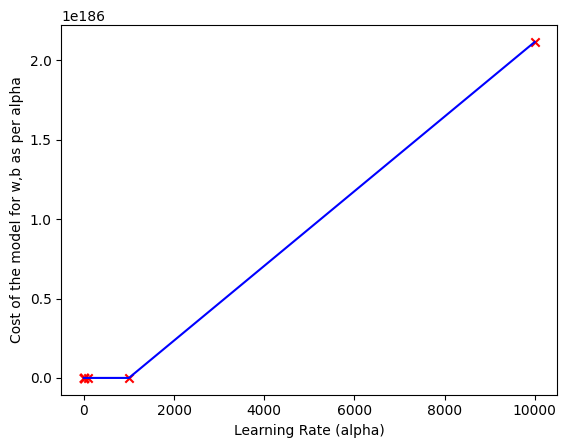

In [22]:
plt.scatter(alpha_array, costs_array, color='red', marker='x')
plt.plot(alpha_array, costs_array, color='blue')
plt.xlabel("Learning Rate (alpha)")
plt.ylabel("Cost of the model for w,b as per alpha")

#### Plotting graph to show variation of Cost with different values of number of iterations

As the number of iterations increases, the cost decreases and after a certain threshold it become nearly constant. Hence the graph starts appearing flat after certain iterations

In [23]:
alpha = 0.001

# Creating an array of different values of number of iterations
num_iters_array = np.array([x for x in range(0, 10000, 200)])

# Creating an empty cost array to fill for different values of alpha
costs_array = np.zeros(num_iters_array.shape[0])

for i, temp_n_iters in enumerate(num_iters_array):
    w = b = 0

    # Calculating the value of w and b using the gradient descent algorithm for different values of alpha
    w, b = gradient_descent(X_train, y_train, w, b, alpha=alpha, num_iters=temp_n_iters)
    print(f"Updated (w, b) after {temp_n_iters} iterations at learning rate {alpha}: ({w}, {b})")

    # Calculating Cost for the computed value of w and b
    costs_array[i] = compute_cost(X_train, y_train, w, b)

Updated (w, b) after 0 iterations at learning rate 0.001: (0, 0)
Updated (w, b) after 200 iterations at learning rate 0.001: (94.25087747970157, 57.90831515818074)
Updated (w, b) after 400 iterations at learning rate 0.001: (141.76020695387493, 86.93371762588872)
Updated (w, b) after 600 iterations at learning rate 0.001: (165.74388219932857, 101.4243470999747)
Updated (w, b) after 800 iterations at learning rate 0.001: (177.88626198485446, 108.60146373893616)
Updated (w, b) after 1000 iterations at learning rate 0.001: (184.0679905943527, 112.09943591261693)
Updated (w, b) after 1200 iterations at learning rate 0.001: (187.24875659812565, 113.74738308940205)
Updated (w, b) after 1400 iterations at learning rate 0.001: (188.91815851965143, 114.46586011677638)
Updated (w, b) after 1600 iterations at learning rate 0.001: (189.82591202753827, 114.71815007037631)
Updated (w, b) after 1800 iterations at learning rate 0.001: (190.34935642327056, 114.73739574030637)
Updated (w, b) after 2000 

Text(0, 0.5, 'Cost of the model for w,b as per alpha')

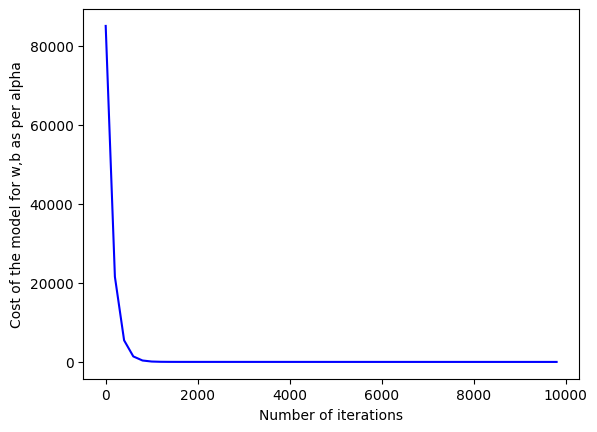

In [24]:
plt.plot(num_iters_array, costs_array, color='blue')
plt.xlabel("Number of iterations")
plt.ylabel("Cost of the model for w,b as per alpha")